In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding 


In [3]:
df = pd.read_hdf('processed.h5', 'df')
df.head()

,review,sentiment,review_length,preprocessed_review,one_hot
0,one reviewers mentioned watching oz episode yo...,positive,167,"[3, 1791, 932, 56, 3147, 282, 347, 2992, 107, ...","[0.0, 1.0]"
1,wonderful little production filming technique ...,positive,84,"[275, 38, 249, 1218, 2836, 17505, 15916, 1485,...","[0.0, 1.0]"
2,thought wonderful way spend time hot summer we...,positive,85,"[96, 275, 26, 979, 8, 774, 1331, 2320, 1054, 8...","[0.0, 1.0]"
3,basically theres family little boy jake thinks...,negative,66,"[567, 124, 136, 38, 325, 3437, 1059, 124, 900,...","[1.0, 0.0]"
4,petter matteis love time money visually stunni...,positive,125,"[15920, -32203, 35, 8, 187, 2002, 1236, 2, 29,...","[0.0, 1.0]"


In [4]:
from helper_functions import clean_text

df['cleaned_text'] = df['review'].apply(clean_text)
max_sentence_length = df.cleaned_text.str.split().apply(len).max()
max_sentence_length

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ctemi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1420

In [5]:
from keras.preprocessing.text import Tokenizer
from helper_functions import preprocess_text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['cleaned_text'])

def preprocess_series(text):
    return preprocess_text(text, max_sentence_length, tokenizer)[0][0]


df['preprocessed_review'] = df['cleaned_text'].apply(preprocess_series)

In [27]:
df.preprocessed_review[0].shape

(1420,)

In [7]:
#check for negative values in preprocessed_review
if df['preprocessed_review'].apply(lambda x: np.any(x < 0)).sum() > 0:
    print('Negative values found')

In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_labels = encoder.fit_transform(df['sentiment'].values)
y_labels

array([1, 1, 1, ..., 0, 0, 0])

In [9]:
#splitting data 
x = np.array([review for review in df['preprocessed_review']])
y = y_labels
x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
#using a simple non deep learning model to predict the sentiment of a movie review
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)

lr_model.fit(x_train_lr, y_train_lr)

lr_predictions = lr_model.predict(x_test_lr)
print("Logistic Regression Accuracy:", accuracy_score(y_test_lr, lr_predictions))
print('Logistic Regression F1 score:', f1_score(y_test_lr, lr_predictions))

#saving the lr_model 
import pickle
pickle.dump(lr_model, open('lr_model.pkl', 'wb'))


Logistic Regression Accuracy: 0.5055
Logistic Regression F1 score: 0.5135268076733891


c:\Users\ctemi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
y = np.array([label for label in df['one_hot']])

In [25]:
df

,review,sentiment,review_length,preprocessed_review,one_hot,cleaned_text
0,one reviewers mentioned watching oz episode yo...,positive,167,"[3, 1791, 932, 56, 3147, 282, 347, 2992, 107, ...","[0.0, 1.0]",one reviewers mentioned watching oz episode yo...
1,wonderful little production filming technique ...,positive,84,"[275, 38, 249, 1218, 2836, 17505, 81452, 1485,...","[0.0, 1.0]",wonderful little production filming technique ...
2,thought wonderful way spend time hot summer we...,positive,85,"[96, 275, 26, 979, 8, 774, 1331, 2320, 1054, 8...","[0.0, 1.0]",thought wonderful way spend time hot summer we...
3,basically theres family little boy jake thinks...,negative,66,"[567, 124, 136, 38, 325, 3437, 1059, 124, 900,...","[1.0, 0.0]",basically theres family little boy jake thinks...
4,petter matteis love time money visually stunni...,positive,125,"[81456, 33333, 35, 8, 187, 2002, 1236, 2, 29, ...","[0.0, 1.0]",petter matteis love time money visually stunni...
...,...,...,...,...,...,...
49995,thought movie right good job wasnt creative or...,positive,84,"[96, 1, 107, 5, 186, 171, 1335, 109, 19, 859, ...","[0.0, 1.0]",thought movie right good job wasnt creative or...
49996,bad plot bad dialogue bad acting idiotic direc...,negative,56,"[16, 37, 16, 294, 16, 36, 2812, 838, 509, 1413...","[1.0, 0.0]",bad plot bad dialogue bad acting idiotic direc...
49997,catholic taught parochial elementary schools n...,negative,115,"[3356, 4097, 41755, 7984, 4346, 8580, 4097, 55...","[1.0, 0.0]",catholic taught parochial elementary schools n...
49998,im going disagree previous comment side maltin...,negative,114,"[54, 70, 2828, 762, 793, 388, 11130, 3, 229, 9...","[1.0, 0.0]",im going disagree previous comment side maltin...


In [32]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.utils import to_categorical

#Since dataset it too large we will Reduce max_sentence_length and vocab_size
max_sentence_length = 200
vocab_size = 5000

# Tokenize the texts
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df['cleaned_text'])
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])

# Pad the sequences
X = pad_sequences(sequences, maxlen=max_sentence_length)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [33]:
# Define the model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_sentence_length))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
625/625 [==============================] - 65s 100ms/step - loss: 0.3499 - accuracy: 0.8465 - val_loss: 0.2787 - val_accuracy: 0.8822
Epoch 2/5
625/625 [==============================] - 58s 93ms/step - loss: 0.2501 - accuracy: 0.8986 - val_loss: 0.2806 - val_accuracy: 0.8832
Epoch 3/5
625/625 [==============================] - 59s 94ms/step - loss: 0.2064 - accuracy: 0.9194 - val_loss: 0.3027 - val_accuracy: 0.8719
Epoch 4/5
625/625 [==============================] - 59s 95ms/step - loss: 0.1657 - accuracy: 0.9373 - val_loss: 0.3276 - val_accuracy: 0.8691
Epoch 5/5
625/625 [==============================] - 61s 97ms/step - loss: 0.1333 - accuracy: 0.9526 - val_loss: 0.3579 - val_accuracy: 0.8711


In [34]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


Test Loss: 0.3578733205795288
Test Accuracy: 0.8711000084877014


In [35]:
model.save('my_model.h5')

c:\Users\ctemi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Model Performance

In [38]:
#Load Logistic Regression Model
import pickle
with open('lr_model.pkl', 'rb') as file:
    lr_model = pickle.load(file)

#Load LSTM model
from keras.models import load_model
lstm_model = load_model('my_model.h5')

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()


Logistic Regression Accuracy: 0.5055


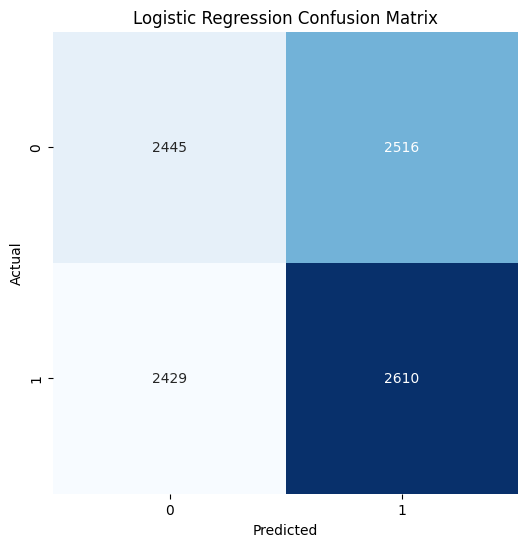

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.49      0.50      4961
           1       0.51      0.52      0.51      5039

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000

Logistic Regression F1 Score: 0.5135268076733891


In [27]:

lr_predictions = lr_model.predict(x_test_lr)

print("Logistic Regression Accuracy:", accuracy_score(y_test_lr, lr_predictions))

# print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test_lr, lr_predictions))
plot_confusion_matrix(y_test_lr, lr_predictions, title='Logistic Regression Confusion Matrix')


print("Logistic Regression Classification Report:\n", classification_report(y_test_lr, lr_predictions))
print("Logistic Regression F1 Score:", f1_score(y_test_lr, lr_predictions))


313/313 [==============================] - 8s 25ms/step
LSTM Model Accuracy: 0.8711


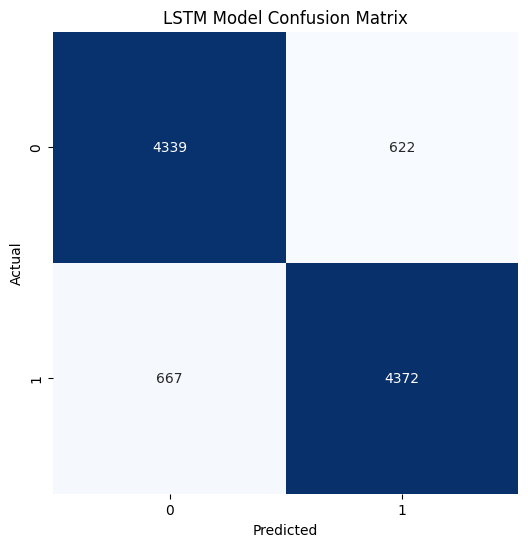

LSTM Model Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4961
           1       0.88      0.87      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

LSTM Model F1 Score: 0.871523970896043


In [46]:
# Make predictions
lstm_predictions = np.argmax(model.predict(x_test), axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Calculate accuracy
lstm_accuracy = accuracy_score(y_test_labels, lstm_predictions)
print(f'LSTM Model Accuracy: {lstm_accuracy}')

# Confusion matrix
# lstm_cm = confusion_matrix(y_test, lstm_predictions)
# print(f'LSTM Model Confusion Matrix:\n{lstm_cm}')

plot_confusion_matrix(y_test_labels, lstm_predictions, title='LSTM Model Confusion Matrix')

# Classification report
lstm_cr = classification_report(y_test_labels, lstm_predictions)
print(f'LSTM Model Classification Report:\n{lstm_cr}')


# F1 score
lstm_f1 = f1_score(y_test_labels, lstm_predictions)
print(f'LSTM Model F1 Score: {lstm_f1}')

